In [1]:
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import scipy.io as sci
import matplotlib.colors as colors
from PIL import Image

In [32]:
# dimensions of our bitmap images, need to be changed for a different data set
rows = 300
cols = 300

# get file paths before looping through and reading them all into vectors
#img_files = glob.glob('owl/*.jpg')
img_files = glob.glob('cathead/*.png')
nimages = len(img_files)
imgs = np.zeros((rows * cols, nimages), dtype=np.uint8)
for i, img in enumerate(img_files):
    imgs[:,i] = np.reshape(Image.open(img,'r').convert('L').resize((rows,cols),Image.LANCZOS),(1,-1),order = "F")

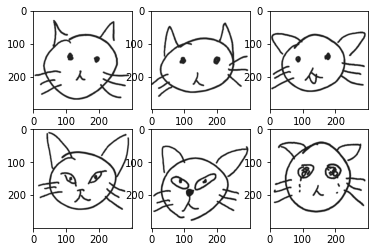

In [33]:
fig, axes = plt.subplots(2,3)
count = 0
for i in range(2):
    for j in range(3):
        axes[i, j].imshow(np.reshape(imgs[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

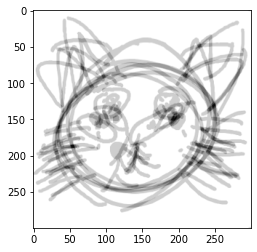

In [35]:
avg_face = np.sum(imgs, axis=1) / nimages
avg_face.astype(np.uint8)
plt.imshow(np.reshape(avg_face, (rows, -1), order='F'), cmap='gray')

In [36]:
A = np.zeros((rows * cols, nimages), dtype=np.int16)
for i in np.arange(nimages):
    A[:, i] = imgs[:, i].astype(np.int16) - avg_face.astype(np.int16)
    A[:, i][A[:, i] < 0] = 0
A.astype(np.uint8) 

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0,  0,  0],
       [ 5,  5,  5,  0,  5,  5],
       [32, 32, 32,  0, 22, 32]], dtype=uint8)

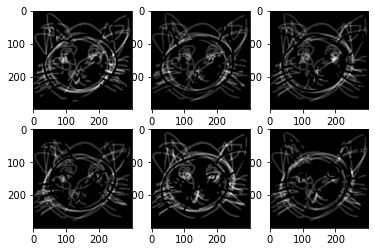

In [37]:
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(A[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

In [38]:
# covariance matrix
S = np.matmul(A.T.astype(float), A.astype(float))
# D is eigenvalues, V is eigenvectors
D, V = np.linalg.eig(S)
# sort D, and then sort V the same way to get the eigenvectors in descending order
order = D.argsort()[::-1]
V = V[:, order]

# normalize U for output
U = np.matmul(A.astype(float), V)
squares = np.square(U)
denom = np.sqrt(np.sum(squares, axis=0))
for i in np.arange(nimages):
    U[:, i] = U[:, i] / denom[i]

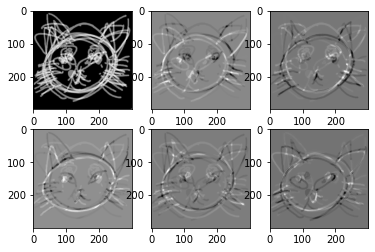

In [39]:
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(U[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

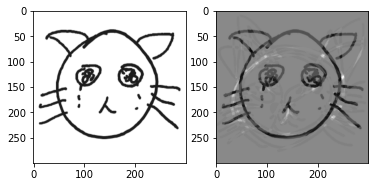

In [40]:
try_reconst = 5
n_eig = 50
omegas = np.matmul(U[:, 1:n_eig].T, (imgs[:, try_reconst].astype(float)) - avg_face)
res = np.matmul(U[:, 1:n_eig], omegas) + avg_face.astype(float)

fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(imgs[:, try_reconst], (rows, -1), order='F'), cmap='gray')
axes[1].imshow(np.reshape(res, (rows, -1), order='F'), cmap='gray')

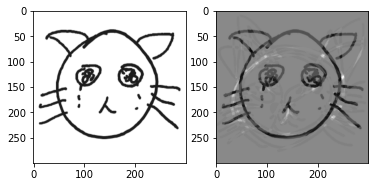

In [41]:
try_reconst = 5
n_eig = 50
omegas = np.matmul(U[:, 1:n_eig].T, (imgs[:, try_reconst].astype(float)) - avg_face)
res = np.matmul(U[:, 1:n_eig], omegas) + avg_face.astype(float)

fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(imgs[:, try_reconst], (rows, -1), order='F'), cmap='gray')
axes[1].imshow(np.reshape(res, (rows, -1), order='F'), cmap='gray')

Text(0, 0.5, 'eigenvalue')

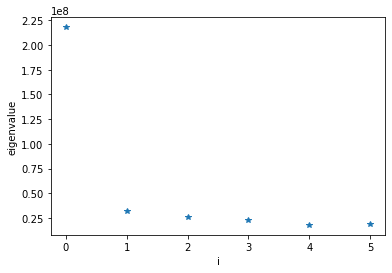

In [42]:
fig = plt.figure()
plt.plot(D, '*')
plt.xlabel('i')
plt.ylabel('eigenvalue')

Text(0, 0.5, 'distortion')

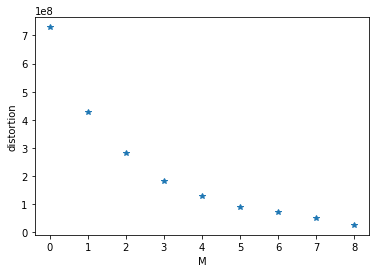

In [31]:
distortion = list()
for i in np.arange(len(D)):
    distortion.append(sum(D[i:]))
    
fig = plt.figure()
plt.plot(distortion, '*')
plt.xlabel('M')
plt.ylabel('distortion')